In [1]:
import cv2
import os
from tqdm import tqdm

In [2]:
cv2.__version__

'4.5.5'

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Create a video capture object, in this case we are reading the video from a file
# better to use 480p or so
fn_video = 'assets/20220523_193958_640.m4v'
fn_video = 'assets/20220523_193958_640.m4v'

In [5]:
vid_capture = cv2.VideoCapture(fn_video)

In [6]:
stride = 30//2 #30 = about 1sec

In [7]:
fn_wo_ext = fn_video.split('/')[-1].split('.')[0]

In [8]:
if stride >1:
    dir_out = os.path.join('frames', fn_wo_ext+'_st_{}'.format(stride))
else:
    dir_out = os.path.join('frames', fn_wo_ext)

In [9]:
dir_out

'frames/20220523_193958_640_st_15'

In [10]:
if not os.path.exists(dir_out):
    os.makedirs(dir_out)

In [11]:
if (vid_capture.isOpened() == False):
    print("Error opening the video file")
else:
    print("video {}....Okay".format(fn_video))
    fps = vid_capture.get(cv2.CAP_PROP_FPS)
    print('Frames per second : ', fps,'FPS')
    frame_count = vid_capture.get(cv2.CAP_PROP_FRAME_COUNT)
    print('Frame count : {:d}'.format( int(frame_count)))
    

video assets/20220523_193958_640.m4v....Okay
Frames per second :  29.975656642591613 FPS
Frame count : 3211


In [12]:
#n = 0
#while(vid_capture.isOpened()):
cnt = 0
for n in tqdm(range( int(frame_count))):
    
    # vid_capture.read() methods returns a tuple, first element is a bool 
    # and the second is frame
    ret, frame = vid_capture.read()
    if n % stride !=0:
        continue
        
    if ret == True:
        #plt.imshow(frame)
        
        #plt.title('#{}'.format(ret))
        fn_out = '{}/frame_{}_{:04d}.png'.format(dir_out, fn_wo_ext, n)
        #print(fn_out)
        cv2.imwrite(fn_out, frame)
        cnt = cnt +1
        
        #plt.savefig(fn_out)
        #cv2.imshow('Frame',frame)
        
        if False:
        # 20 is in milliseconds, try to increase the value, say 50 and observe
            key = cv2.waitKey(20)

            if key == ord('q'):
                break
    else:
        break

100%|██████████| 3211/3211 [00:05<00:00, 635.26it/s]


In [13]:
dir_out

'frames/20220523_193958_640_st_15'

In [14]:
cnt

215

In [15]:
# Release the video capture object
vid_capture.release()
cv2.destroyAllWindows()

In [16]:
import glob

In [17]:
files = glob.glob(dir_out+'/*.png')

In [18]:
files = sorted(files)

In [19]:
nfiles = len(files)

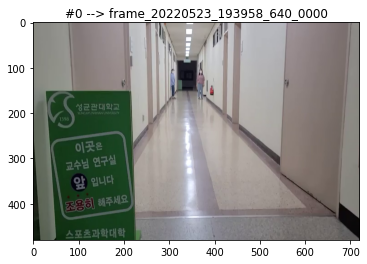

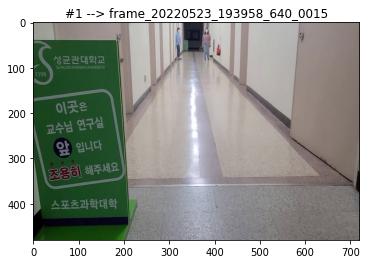

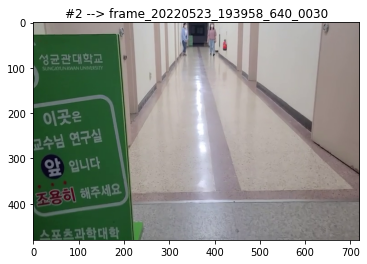

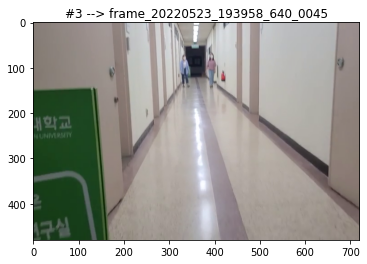

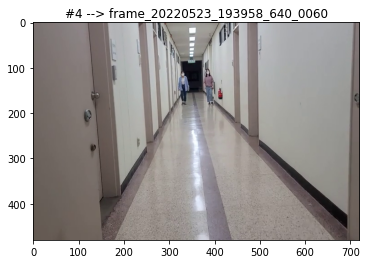

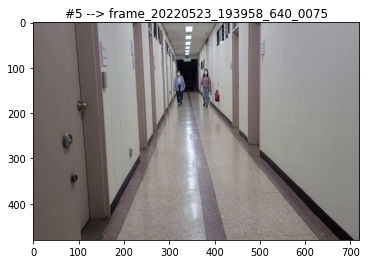

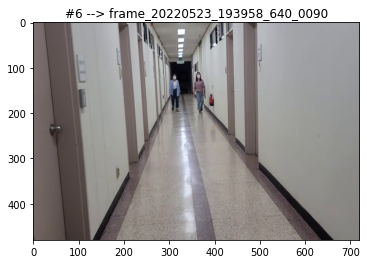

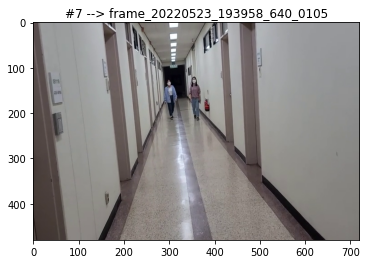

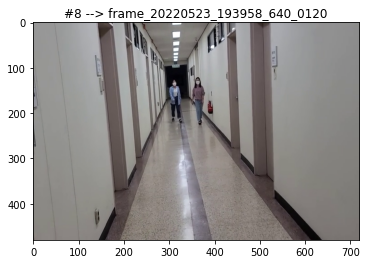

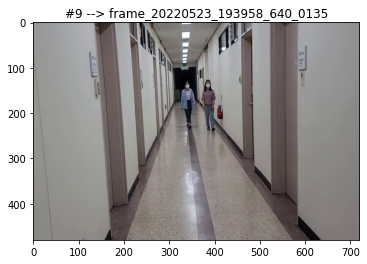

In [20]:
for i in range(10):
    idx = i #nfiles[0]
    fn = files[idx]
    #print(fn)
    fn_wo_ext = fn.split('/')[-1].split('.')[0]
    img = cv2.imread(fn)
    
    dst = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure()
    plt.imshow(dst)
    plt.title('#{} --> {}'.format(idx, fn_wo_ext))

In [21]:
dir_out

'frames/20220523_193958_640_st_15'